In [2]:
# autoreload
%load_ext autoreload
%autoreload 2

# change current working directory to the root of the project
import os
os.chdir(os.path.dirname(os.getcwd()))

# Purpose
- Purpose of this notebook is to build baseline models

In [40]:
import warnings
from IPython.display import display

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import brier_score_loss
from sklearn.metrics import confusion_matrix

In [4]:
# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

/var/folders/rx/jl4f7yr95xd03cgb4sg2w99h0000gn/T/ipykernel_2031/4075833985.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Load Data

In [13]:
nrows = None
X_train = pd.read_csv("data/transformed/X_train.csv", nrows=nrows)
X_test = pd.read_fwf("data/transformed/X_test.txt", nrows=nrows)

y_train = pd.read_csv("data/transformed/y_train.csv", nrows=nrows)
y_train = y_train.rename(columns={"5": "activity"})
y_test = pd.read_fwf("data/transformed/y_test.txt", nrows=nrows)
y_test = y_test.rename(columns={"5": "activity"})

display(X_test.head())
display(y_test.head())

,2.5717778e-001,-2.3285230e-002,-1.4653762e-002,-9.3840400e-001,-9.2009078e-001,-6.6768331e-001,-9.5250112e-001,-9.2524867e-001,-6.7430222e-001,-8.9408755e-001,...,7.1645446e-002,-3.3037044e-001,-7.0597388e-001,6.4624029e-003,1.6291982e-001,-8.2588562e-001,2.7115145e-001,-7.2000927e-001,2.7680104e-001,-5.7978304e-002
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,0.083603,-0.493517,-0.857565,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471


,activity
0,5
1,5
2,5
3,5
4,5


# Baseline Model 1
- Zero-Rate Model
- Predcit the most frequent class

In [15]:
class BaselineModelZeroR:
    '''ZeroR baseline model that always predicts the most frequent class'''
    
    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
        
    def predict(self, X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:

        # merge X and y on index
        df = X.merge(y, left_index=True, right_index=True)

        # get the most frequent class
        most_frequent_class = df['activity'].value_counts().index[0]

        # create predictions
        predictions = [most_frequent_class] * len(df)

        return np.array(predictions)

In [16]:
model = BaselineModelZeroR()
model.fit(X_train, y_train)
predictions_baseline_model_1 = model.predict(X_test, y_test)

Classification Report
---------------------
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       496
           2       0.00      0.00      0.00       471
           3       0.00      0.00      0.00       420
           4       0.00      0.00      0.00       491
           5       0.00      0.00      0.00       531
           6       0.18      1.00      0.31       537

    accuracy                           0.18      2946
   macro avg       0.03      0.17      0.05      2946
weighted avg       0.03      0.18      0.06      2946



/Users/ani/Projects/4_conformal_prediction_using_LSTM/.4_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ani/Projects/4_conformal_prediction_using_LSTM/.4_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ani/Projects/4_conformal_prediction_using_LSTM/.4_venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

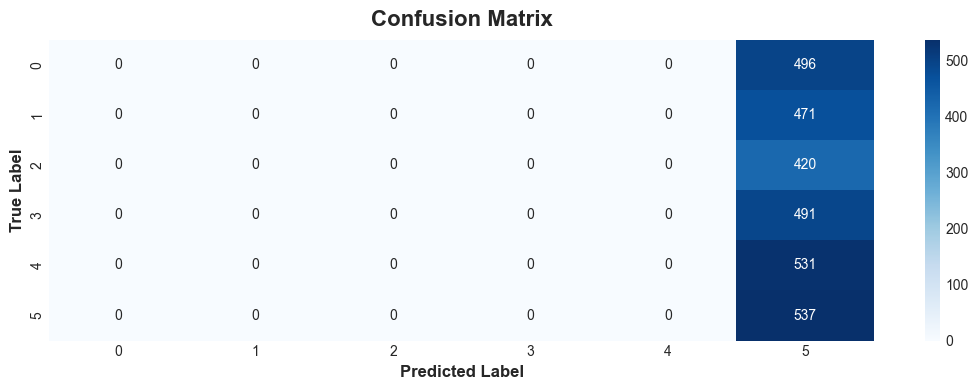

In [42]:
# create confusion matrix for multiclass classification
cm = confusion_matrix(y_test, predictions_baseline_model_1)
cm = pd.DataFrame(cm, columns=['0', '1', '2', '3', '4', '5'], index=['0', '1', '2', '3', '4', '5'])

# classification report
print('Classification Report')
print('---------------------')
print(classification_report(y_test, predictions_baseline_model_1))

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Baseline Model 2
- Random-Rate Model
- Predicts a random class with the same probability as the most frequent class

In [44]:
class BaselineModelRandom:
    '''Random baseline model that randomly predicts 0 or 1 based on the distribution of the training set'''

    def fit(self, X_train: pd.DataFrame, y_train: pd.Series):
        pass
        
    def predict(self, X: pd.DataFrame, y: pd.DataFrame) -> pd.DataFrame:

        # merge X and y on index
        df = X.merge(y, left_index=True, right_index=True)

        # get the distribution of the training set
        distribution = df['activity'].value_counts(normalize=True)

        # create predictions
        predictions = np.random.choice(distribution.index, size=len(df), p=distribution.values)

        return np.array(predictions)

In [46]:
model = BaselineModelRandom()
model.fit(X_train, y_train)
predictions_baseline_model_2 = model.predict(X_test, y_test)

Classification Report
---------------------
              precision    recall  f1-score   support

           1       0.15      0.15      0.15       496
           2       0.17      0.17      0.17       471
           3       0.14      0.14      0.14       420
           4       0.17      0.18      0.18       491
           5       0.15      0.15      0.15       531
           6       0.20      0.20      0.20       537

    accuracy                           0.16      2946
   macro avg       0.16      0.16      0.16      2946
weighted avg       0.16      0.16      0.16      2946



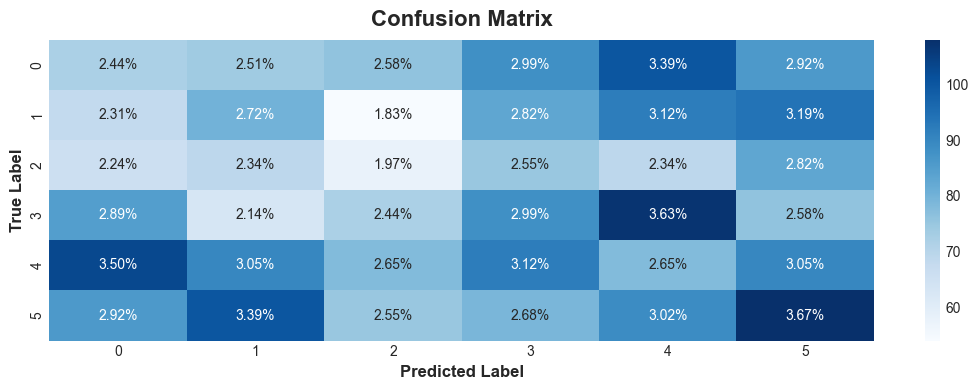

In [47]:
# create confusion matrix for multiclass classification as percentage
cm = confusion_matrix(y_test, predictions_baseline_model_2)

group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [v1 for v1 in zip(group_percentages)]
labels = np.asarray(labels).reshape(6,6)

# classification report
print('Classification Report')
print('---------------------')
print(classification_report(y_test, predictions_baseline_model_2))

# plot confusion matrix
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [48]:
# save predictions
pd.DataFrame(predictions_baseline_model_2).to_csv("predictions/predictions_baseline_model_2.csv", index=False)

# save predictions
pd.DataFrame(predictions_baseline_model_1).to_csv("predictions/predictions_baseline_model_1.csv", index=False)
